In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

--2023-01-24 06:08:42--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2023-01-24 06:08:43--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbceb070c342fd6f599811cf296.dl.dropboxusercontent.com/cd/0/inline/B1LHIoDHjHVcDyL_BoRjazlbaCVx5cXVuztJ4aIF18wHlq7yykajgi0V_YVZqoHtkcBT9VWlJZ1_WVLp7zYK_lQbFUv3aF9lzlJMmQmu4SGWiy3jMWoPSm4GIvPjb34o4tX8TFC4VRx23miKpPO4kapU10nIBShtv_NtAWhSrUUaBw/file# [following]
--2023-01-24 06:08:43--  https://ucbceb070c342fd6f599811cf296.dl.dropboxusercontent.com/cd/0/inline/B1LHIoDHjHVcDyL_BoRjazlbaCVx5cXVuztJ4aIF18wHlq7yykajgi0V_YVZqoHtkcBT9VWlJZ1_WVLp7zYK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


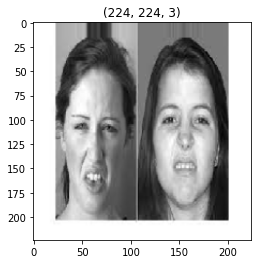

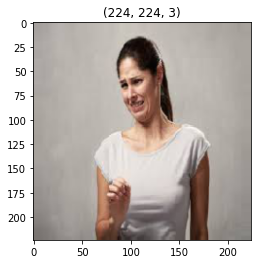

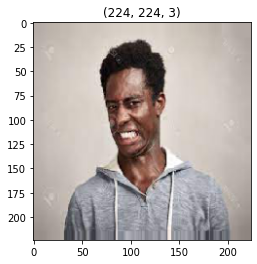

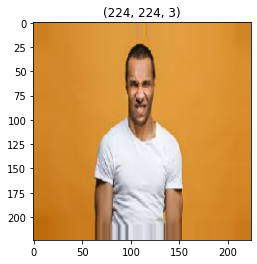

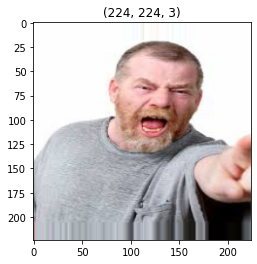

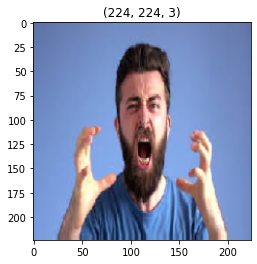

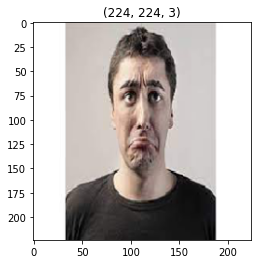

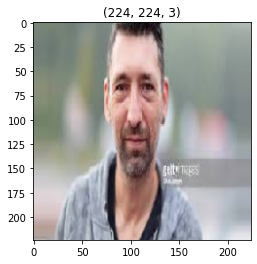

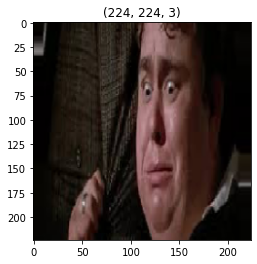

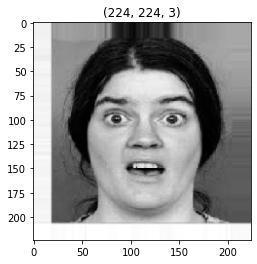

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [ ]:
# having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]
     

hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

<ipython-input-8-ffc71dba6056>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 12.8334 - accuracy: 0.1698
Epoch 1: val_accuracy improved from -inf to 0.46484, saving model to best_model.h5
10/10 [==============================] - 31s 3s/step - loss: 12.8334 - accuracy: 0.1698 - val_loss: 5.5784 - val_accuracy: 0.4648
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.1885 - accuracy: 0.4937
Epoch 2: val_accuracy improved from 0.46484 to 0.60547, saving model to best_model.h5
10/10 [==============================] - 21s 2s/step - loss: 5.1885 - accuracy: 0.4937 - val_loss: 3.3115 - val_accuracy: 0.6055
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 3.2076 - accuracy: 0.6447
Epoch 3: val_accuracy improved from 0.60547 to 0.81641, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 3.2076 - accuracy: 0.6447 - val_loss: 0.9290 - val_accuracy: 0.8164
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.1050

In [ ]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

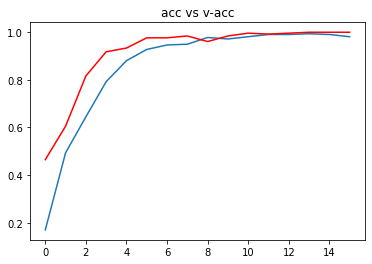

In [ ]:
h =  hist.history
h.keys()
     

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()
#print("Accuracy = ", accuracy)
     


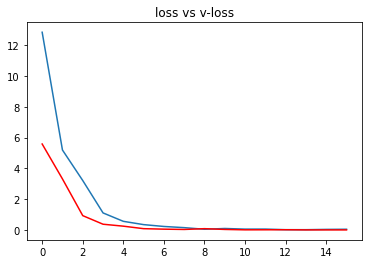

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 56ms/step
 The person in the image was Disguist


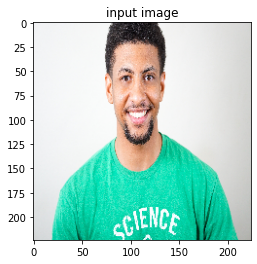

In [ ]:
# path for the image to see if it predics correct class

path = "/content/face1.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The person in the image was {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred=y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy = ",accuracy) 

NameError: ignored